In [1]:
import pandas as pd

# 물질_온도_길이_농도_번호
f1 = 'measure_temperature_length_2%_1'
f2 = 'measure_temperature_length_5%_1'
f3 = 'measure_temperature_length_10%_1'
f4 = 'measure_temperature_length_15%_1'
f5 = 'measure_temperature_length_20%_1'
d1 = pd.read_csv(f'{f1}.csv', encoding='cp949')
d2 = pd.read_csv(f'{f2}.csv', encoding='cp949')
d3 = pd.read_csv(f'{f3}.csv', encoding='cp949')
d4 = pd.read_csv(f'{f4}.csv', encoding='cp949')
d5 = pd.read_csv(f'{f5}.csv', encoding='cp949')

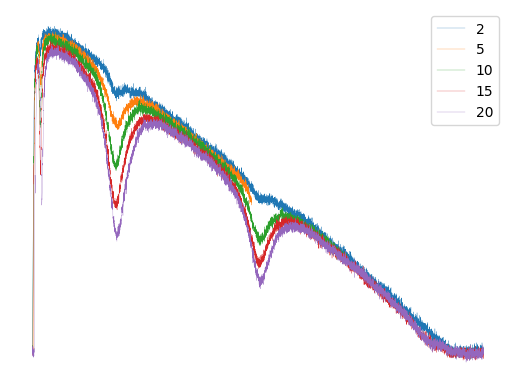

In [2]:
### 데이터 분석

import matplotlib.pyplot as plt
import re

def extract(data,t0,t1):
    '''
    주어진 시간 구간 [t0, t1]에 해당하는 주파수 값을 추출

    Args:
        data (pd.DataFrame): 시간-주파수 데이터 프레임
        t0 (int): 나눌 시간의 시작 시간
        t1 (int): 나눌 시간의 마지막 시간

    Returns:
        pd.DataFrame: t0~t1 사이의 주파수 데이터 [base, 기준신호 1]
    '''
    return data[(t0<=data['time'])&(data['time']<=t1)].reset_index(drop=True)[['base','기준신호 1']]

def get_cycle(data,file):
    '''
    한 주기 추출한 뒤 시각화

    Args:
        data (pd.DataFrame): 시간-주파수 데이터 프레임
        file (str): 원본 파일명
    '''
    # 시간 [0,2] 구간 내 주파수
    e = extract(data,0,2)
    # 농도
    f = re.search(r'_(\d+)%',file).group(1)

    # 기준신호의 최솟값
    start = e.sort_values('기준신호 1').index[0]
    # 한 주기의 샘플링 데이터 갯수
    end = start + sampling

    # 한 주기
    cycle = e[start:end].reset_index(drop=True)
    plt.plot(cycle.base, linewidth=.2, label=f)
    plt.axis('off')
    plt.legend()

get_cycle(d1,f1)
get_cycle(d2,f2)
get_cycle(d3,f3)
get_cycle(d4,f4)
get_cycle(d5,f5)

# 농도에 따라 골자기가 깊어지는 경향성을 볼 수 있다.

In [3]:
import os

def extract(data,t0,t1):
    '''
    주어진 시간 구간 [t0, t1]에 해당하는 주파수 값을 추출

    Args:
        data (pd.DataFrame): 시간-주파수 데이터 프레임
        t0 (int): 나눌 시간의 시작 시간
        t1 (int): 나눌 시간의 마지막 시간

    Returns:
        pd.DataFrame: t0~t1 사이의 주파수 데이터 [base, 기준신호 1]
    '''
    return data[(t0<=data['time'])&(data['time']<=t1)][['base','기준신호 1']]


def to_jpg(data, file):
    '''
    한 주기 추출 후 시각화하여 jpg로 저장

    Args:
        data (pd.DataFrame): 원본 데이터 프레임
        file (str): 원본 파일명
    '''
    # 폴더 생성
    folder = os.path.join('../data', 'concentration', file)
    os.makedirs(folder, exist_ok=True)

    # 샘플(주기) 갯수, 시작 인덱스, 끝 인덱스
    n, start, end = 0, 0, 0
    while 1:
        # 기준신호의 최솟값이 주기 시작
        start = extract(data,n,n+1)['기준신호 1'].idxmin()
        # 한 주기의 샘플링 데이터 갯수
        end = start + sampling
        
        # 범위를 벗어나면 탈출
        if end > len(data):
            break
        
        # 한 주기
        cycle = data[start:end].reset_index(drop=True)

        # 시각화
        plt.figure(figsize=(10,10),dpi=100)
        plt.plot(cycle['기준신호 1'])
        plt.plot(cycle.base)
        plt.axis('off')
        # jpg로 저장
        plt.savefig(os.path.join(folder, f'sample_{n}.jpg'))
        plt.close()

        # n 업데이트
        n += 1

to_jpg(d1, f1)
to_jpg(d2, f2)
to_jpg(d3, f3)
to_jpg(d4, f4)
to_jpg(d5, f5)

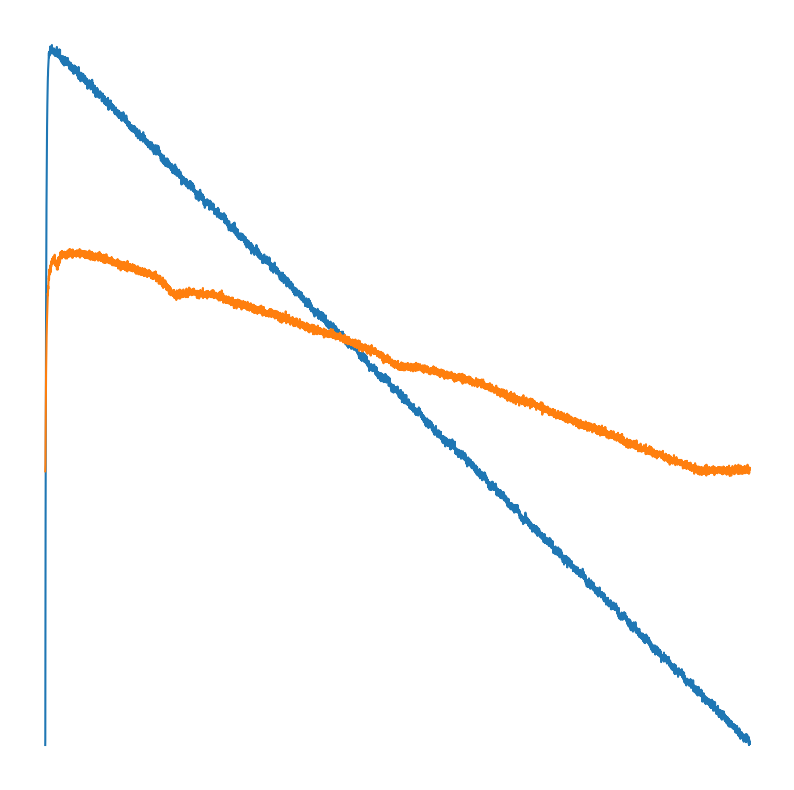

In [4]:
### 예시 사진: 농도 2%, 1번째 주기

n = 0

# 기준신호의 최솟값이 주기 시작
start = extract(d1,n,n+1)['기준신호 1'].idxmin()
# 한 주기의 샘플링 데이터 갯수
end = start + sampling

# 한 주기
cycle = d1[start:end].reset_index(drop=True)

# 시각화
plt.figure(figsize=(10,10),dpi=100)
plt.plot(cycle['기준신호 1'])
plt.plot(cycle.base)
plt.axis('off')
plt.show()

### 저장